#### Import necessary libraries for Data Cleaning

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [107]:
df=pd.read_csv("F:\Downloads\h1b_kaggle.csv")

In [108]:
df = df[(df.CASE_STATUS == "CERTIFIED") | (df.CASE_STATUS == "DENIED")] #Keep only certified and denied cases

In [109]:
df.WORKSITE = df.WORKSITE.apply(lambda m: m.split(",")[1].strip()) #Strip cities and keep only states in worksite

#### Drop unnecessary columns 

In [110]:
df.drop('lat', axis=1, inplace=True)
df.drop('lon', axis=1, inplace=True)

In [111]:
df.drop('Unnamed: 0', axis=1, inplace=True)

#### Keep only finite values

In [112]:
df = df[np.isfinite(df['PREVAILING_WAGE'])]
df = df[df['WORKSITE'] != "NA"]
df = df[df['FULL_TIME_POSITION'].notnull()]
df = df[df['JOB_TITLE'].notnull()]
df = df[df['SOC_NAME'].notnull()]
df = df[df['EMPLOYER_NAME'].notnull()]

In [113]:
df = pd.get_dummies(df, columns=['FULL_TIME_POSITION'])

In [114]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED': 1, 'DENIED': 0})

In [115]:
df['SOC_NAME'] = df['SOC_NAME'].apply(lambda x : x.strip().upper()) #Convert all to same case so Computer and COMPUTEr becomes similar

In [116]:
df.drop('EMPLOYER_NAME', axis=1, inplace=True)
df.drop('YEAR', axis=1, inplace=True)

In [117]:
df.drop('FULL_TIME_POSITION_N', axis=1, inplace=True)

In [118]:
# SOC_CATEGORIES made after analysis
soc_categories = {
                    'EXECUTIVES' : ['CHIEF', 'EXECUTIVE', 'CEO', 'CFO'],
                  'ACTOR' : ['ACTOR', 'MUSIC'],
                  'MANAGERS' : ['MANAGER', 'MANAGER'],
                 'SCIENTIST' : ['SCIENTIST'],
                  'DATA' : ['DATA'],
                 'COMPUTER' : ['PROGRAMMER, COMPUTER', 'DEVELOPER', 
                              'INFORMATION', 'SOFTWARE'],
                  'EDUCATION' : ['EDUCATION', 'TEACHER', 'PROFESSOR',
                                 'ENGLISH', 'LANGUAGE', 'SCHOOL'],
                  'ENGINEER' : ['ENGINEER', 'TECHNICIAN', 'ELECTRONIC',
                                'ELECTRICAL', 'INDUSTRIAL', 'MECHANICAL'],
                  'PILOT' : ['PILOT'],
                  'MEDICAL' : ['DENTIST', 'MEDICAL', 'MENTAL', 'ORTHO',
                               'PHYSICIAN', 'RADIOLO'],
                  'MEDICINE-OTHERS' : ['PHARMACY', 'HEALTH', 'DIET'],
                  'DESIGNER' : ['DESIGNER'],
                  'DETECTIVE' : ['DETECTIVE'],
                  'BIOLOGIST' : ['BIO'],
                  'BUSINESS' : ['BUSINESS'],
                  'COOK' : ['COOK'],
                  'STATISTICIAN' : ['ANALYS', 'STATISTIC'],
                  'FINANCE' : ['FINANC', 'LOAN', 'SECURITY', 'ACCOUNTANT'],
                  'GEOLOGIST' : ['GEO'],
                  'SALES & MARKETING' : ['SALE', 'MARKET'],
                 } 

def find_category(unknown):
    unknown = unknown.upper()
    for key in soc_categories:
        for i in soc_categories[key]: 
            if(unknown.startswith(i) or unknown.find(i) != -1):
                return key
    return 'OTHER'

df['SOC_NAME'] = df['SOC_NAME'].apply(find_category)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F414A55898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001F4516A33C8>], dtype=object)

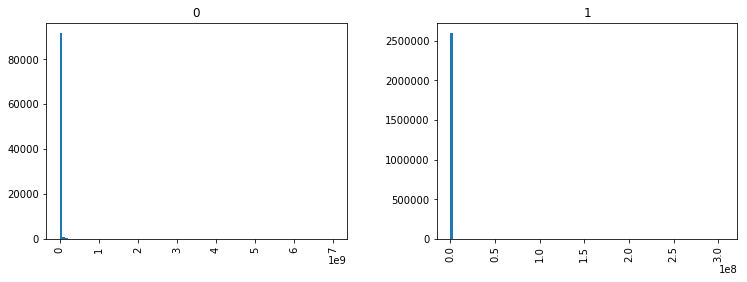

In [119]:
#View wage w.r.t case_status
df.hist(column='PREVAILING_WAGE', by='CASE_STATUS', bins=100,figsize=(12,4))

#### Finding top 30 job titles

In [120]:
df['frequency_job_title'] = df.groupby('JOB_TITLE')['JOB_TITLE'].transform('count').sort_values(ascending=False)

In [121]:
df2 = df.groupby('JOB_TITLE').count().sort_values(ascending=False, by='frequency_job_title').head(30)

In [122]:
df2

,CASE_STATUS,SOC_NAME,PREVAILING_WAGE,WORKSITE,FULL_TIME_POSITION_Y,frequency_job_title
JOB_TITLE,,,,,,
PROGRAMMER ANALYST,225034,225034,225034,225034,225034,225034
SOFTWARE ENGINEER,104669,104669,104669,104669,104669,104669
COMPUTER PROGRAMMER,64848,64848,64848,64848,64848,64848
SYSTEMS ANALYST,56507,56507,56507,56507,56507,56507
SOFTWARE DEVELOPER,38649,38649,38649,38649,38649,38649
BUSINESS ANALYST,35872,35872,35872,35872,35872,35872
COMPUTER SYSTEMS ANALYST,31977,31977,31977,31977,31977,31977
TECHNOLOGY LEAD - US,28312,28312,28312,28312,28312,28312
TECHNOLOGY ANALYST - US,26013,26013,26013,26013,26013,26013


#### Save top 30 job titles in an array

In [123]:
top_jobs = df2.index.tolist()

In [124]:
top_jobs

['PROGRAMMER ANALYST',
 'SOFTWARE ENGINEER',
 'COMPUTER PROGRAMMER',
 'SYSTEMS ANALYST',
 'SOFTWARE DEVELOPER',
 'BUSINESS ANALYST',
 'COMPUTER SYSTEMS ANALYST',
 'TECHNOLOGY LEAD - US',
 'TECHNOLOGY ANALYST - US',
 'SENIOR SOFTWARE ENGINEER',
 'SENIOR CONSULTANT',
 'CONSULTANT',
 'ASSISTANT PROFESSOR',
 'PHYSICAL THERAPIST',
 'PROJECT MANAGER',
 'DATABASE ADMINISTRATOR',
 'ACCOUNTANT',
 'DEVELOPER',
 'COMPUTER PROGRAMMER ANALYST',
 'ASSOCIATE',
 'RESEARCH ASSOCIATE',
 'ANALYST',
 'LEAD ENGINEER',
 'SYSTEMS ENGINEER - US',
 'COMPUTER SYSTEMS ENGINEER',
 'SENIOR SOFTWARE DEVELOPER',
 'BUSINESS SYSTEMS ANALYST',
 'MANAGER',
 'MARKET RESEARCH ANALYST',
 'FINANCIAL ANALYST']

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2690618 entries, 18 to 3002392
Data columns (total 7 columns):
CASE_STATUS             int64
SOC_NAME                object
JOB_TITLE               object
PREVAILING_WAGE         float64
WORKSITE                object
FULL_TIME_POSITION_Y    uint8
frequency_job_title     int64
dtypes: float64(1), int64(2), object(3), uint8(1)
memory usage: 146.3+ MB


In [126]:
# Keep only top jobs in dataframe
df3 = df
df3 = df3[df3['JOB_TITLE'].apply(lambda x : x in top_jobs)]

In [127]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894236 entries, 728 to 3002378
Data columns (total 7 columns):
CASE_STATUS             894236 non-null int64
SOC_NAME                894236 non-null object
JOB_TITLE               894236 non-null object
PREVAILING_WAGE         894236 non-null float64
WORKSITE                894236 non-null object
FULL_TIME_POSITION_Y    894236 non-null uint8
frequency_job_title     894236 non-null int64
dtypes: float64(1), int64(2), object(3), uint8(1)
memory usage: 48.6+ MB


In [128]:
df3.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,PREVAILING_WAGE,WORKSITE,FULL_TIME_POSITION_Y,frequency_job_title
728,1,MANAGERS,PROJECT MANAGER,167024.0,COLORADO,1,17573
737,1,MANAGERS,PROJECT MANAGER,167024.0,COLORADO,1,17573
916,0,MANAGERS,MANAGER,57033.6,CALIFORNIA,0,8307
922,1,MANAGERS,PROJECT MANAGER,69514.0,FLORIDA,0,17573
947,1,MANAGERS,MANAGER,57033.6,CALIFORNIA,0,8307


In [129]:
# Drop freauency as we don't need it anymore
df3.drop('frequency_job_title', axis=1, inplace=True)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
df3.head()

,CASE_STATUS,SOC_NAME,JOB_TITLE,PREVAILING_WAGE,WORKSITE,FULL_TIME_POSITION_Y
728,1,MANAGERS,PROJECT MANAGER,167024.0,COLORADO,1
737,1,MANAGERS,PROJECT MANAGER,167024.0,COLORADO,1
916,0,MANAGERS,MANAGER,57033.6,CALIFORNIA,0
922,1,MANAGERS,PROJECT MANAGER,69514.0,FLORIDA,0
947,1,MANAGERS,MANAGER,57033.6,CALIFORNIA,0


In [131]:
from sklearn import preprocessing

In [132]:
# Get dummies of columns to prepare data for machine learning
df3 = pd.get_dummies(df3, columns=['JOB_TITLE', 'WORKSITE', 'SOC_NAME'])

In [133]:
df3.head() #View our data

,CASE_STATUS,PREVAILING_WAGE,FULL_TIME_POSITION_Y,JOB_TITLE_ACCOUNTANT,JOB_TITLE_ANALYST,JOB_TITLE_ASSISTANT PROFESSOR,JOB_TITLE_ASSOCIATE,JOB_TITLE_BUSINESS ANALYST,JOB_TITLE_BUSINESS SYSTEMS ANALYST,JOB_TITLE_COMPUTER PROGRAMMER,...,SOC_NAME_EXECUTIVES,SOC_NAME_FINANCE,SOC_NAME_GEOLOGIST,SOC_NAME_MANAGERS,SOC_NAME_MEDICAL,SOC_NAME_MEDICINE-OTHERS,SOC_NAME_OTHER,SOC_NAME_SALES & MARKETING,SOC_NAME_SCIENTIST,SOC_NAME_STATISTICIAN
728,1,167024.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
737,1,167024.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
916,0,57033.6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
922,1,69514.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
947,1,57033.6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


#### Normalize wage by dividing it with mean

In [134]:
wage_mean = df3['PREVAILING_WAGE'].mean()
df3['PREVAILING_WAGE'] = df3['PREVAILING_WAGE'].apply(lambda x : x/wage_mean)

#### Take only 100,000 positive values and all negative values to balance the data (As the data is imbalanced)

In [135]:
df_zeros = df3.loc[df3['CASE_STATUS'] == 0]
df_ones = df3.loc[df3['CASE_STATUS'] == 1].sample(n=100000, random_state=25)
frames = [df_zeros, df_ones]
result = pd.concat(frames)

#### Run Sklearn to get a measure for comparison

In [136]:
X = result.ix[:,1:].values

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [137]:
y = result.ix[:,0].values

In [138]:
# Normalize data as a part of trial and error to improve efficiency
normalized_X = preprocessing.normalize(X)

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = .3)

In [140]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
y_pred = LogReg.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 1073,  4865],
       [  680, 29314]])

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.61      0.18      0.28      5938
          1       0.86      0.98      0.91     29994

avg / total       0.82      0.85      0.81     35932



#### Note - We ran Logistic Regression on Spark to get accuracy and found out that though this data has more precision, Recall is low for negative cases which is not a good model, so we decided to not go ahead with this model

In [144]:
result.to_csv('h1btest.csv')